Generate a binary random signal (0 or 1). Compute its histogram, mean, and
autocorrelation.
Estimate its PSD using Welch’s method with different window sizes.

Global Mean: 0.4914, Global Variance: 0.2499


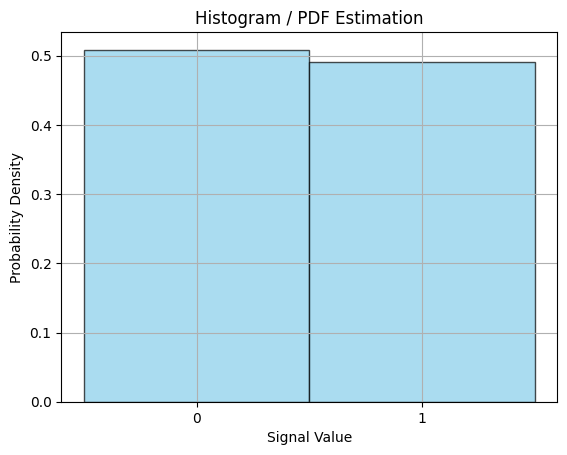

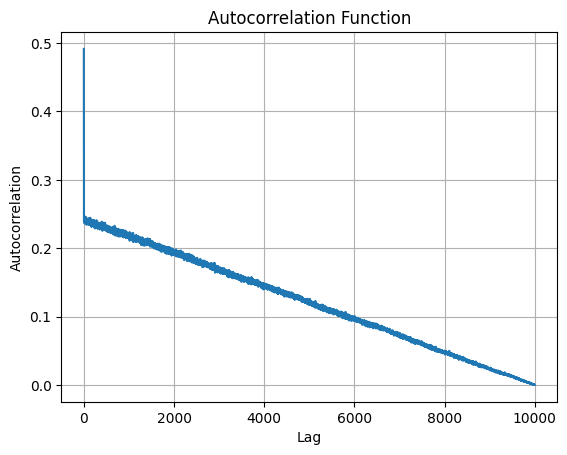

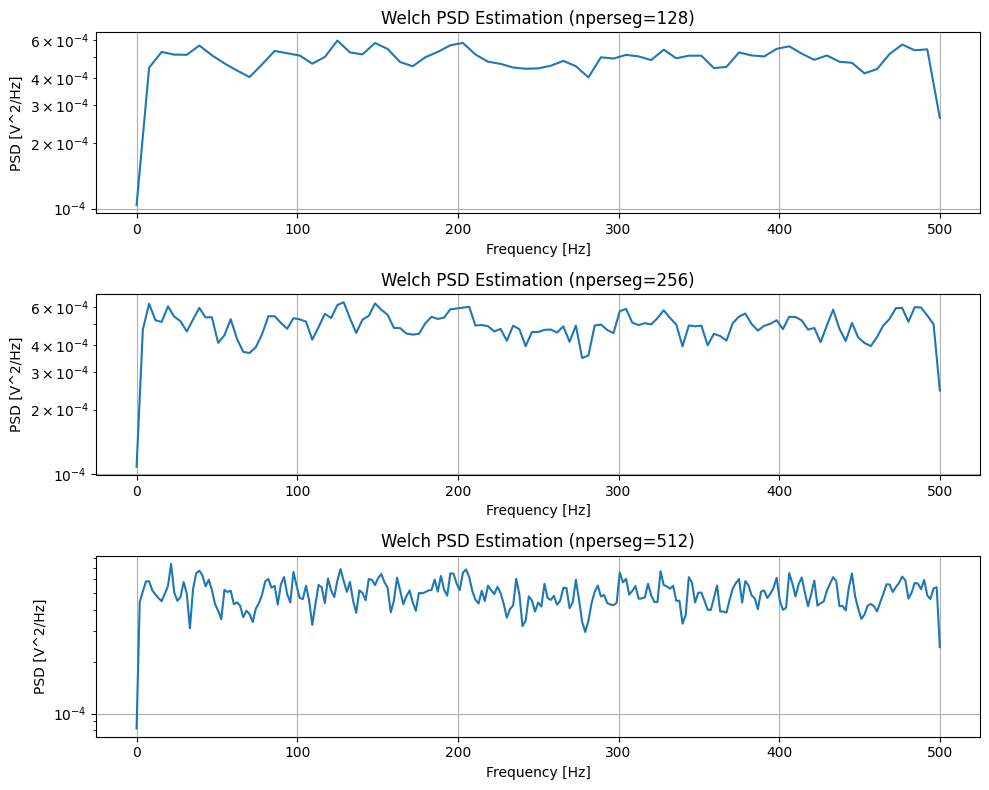

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, welch

N = 10000
fs = 1000
mean_val = 0
std_dev = 1

# Generate a binary signal (0 or 1)
signal = np.random.randint(0, 2, size=N)

mean_signal = np.mean(signal)
var_signal = np.var(signal)
print(f"Global Mean: {mean_signal:.4f}, Global Variance: {var_signal:.4f}")

plt.figure()

plt.hist(signal, bins=[-0.5, 0.5, 1.5], density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram / PDF Estimation")
plt.xlabel("Signal Value")
plt.ylabel("Probability Density")
plt.xticks([0, 1])
plt.grid(True)

def autocorrelation(x):
    result = correlate(x, x, mode='full')
    result = result[result.size // 2:] / len(x)
    return result

autocorr = autocorrelation(signal)

plt.figure()
plt.plot(autocorr)
plt.title("Autocorrelation Function")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

# PSD Estimation
window_sizes = [128, 256, 512]
plt.figure(figsize=(10, 8))

for i, nperseg in enumerate(window_sizes, start=1):
    f, Pxx = welch(signal, fs=fs, nperseg=nperseg, noverlap=nperseg//2, window='hann')
    plt.subplot(len(window_sizes), 1, i)
    plt.semilogy(f, Pxx)
    plt.title(f"Welch PSD Estimation (nperseg={nperseg})")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("PSD [V^2/Hz]")
    plt.grid(True)
    
plt.tight_layout()
plt.show()